In [1]:
%load_ext autoreload
%autoreload 2

## 0. Import dependencies

In [4]:
import sys
import os
from pathlib import Path
# Get the parent directory and add it to sys.path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

from data_builder import TimeSeriesBuilder, read_trans, read_labels
from utils import read_data, set_seed
from models import Model
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from training import train, test
from tqdm import tqdm

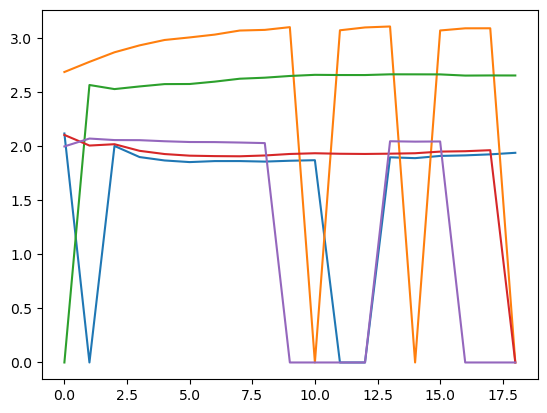

: 

In [9]:
folder = '../../Xenium/BreastS1R1/'
data_folder = folder + 'TimeSeries/'
model_folder = folder + 'Models/'

# Set parameters
SEQ_LEN = 20
dim_inputs = 10
hidden_size = 100
latent_size = 100

gene = 'GATA3'
# load test data
data_path = data_folder + gene + '_data.csv'
locs_path = data_folder + gene + '_locs.csv'
data, locs = read_data(data_path, locs_path, SEQ_LEN, dim_inputs)
test_size = int(data.shape[0] * 0.1)
test_data = data[-test_size:]
test_locs = locs[-test_size:]

prediction, generation, trans_status, loss_recon = test(test_data, test_locs, net)
prediction = prediction.cpu().detach().numpy()

for i in range(5,10):
    gen = generation[i].view(-1).cpu().detach().numpy()
    status = trans_status[i].view(-1).cpu().detach().numpy()
    plt.plot(status*gen)
plt.show()